# **06. Comparing Freematics, Arduino, C++ e Python**

## 1. Modules import

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as dt
import seaborn as sns
from sklearn import preprocessing
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px
from random import randint, sample
import time

from sklearn.metrics import classification_report, confusion_matrix, f1_score, accuracy_score, recall_score
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [2]:
from teda import TEDA
from RLSFilter import RLSFilter

from treating import dataTreating, dataSpliting, dataProcessing, dataSplit

## 2. Data import

### 2.1 Freematics data

In [3]:
data = pd.read_csv("comparison/forecasting_17_05_2024_viagem_170.csv")
data['speed'] = data['speed'].astype('float')
data = data[0:300]

#### In the Arduino simulation, the input dataset is declared as an array. Then, a loop is created to iterate over each data point for the application of the TEDA RLS algorithm.

### 2.2 Arduino data

In [4]:
data_arduino = pd.read_excel("comparison/data_arduino_teda170_de_0_a_300.xlsx")
y_pred_ar = data_arduino['y_pred_ar'].values.tolist()
flag_ar = data_arduino['flag_ar'].values.tolist()

data['flag_ar'] = data_arduino['flag_ar']
data['y_pred_ar'] = data_arduino['y_pred_ar']


### 2.3 C++ data
#### Check the C++ Repository [here](https://github.com/pedrohmeiraa).

In [5]:
y_pred_cpp = [0, 28.0897, 29.0861, 33.7203, 38.7148, 43.791, 47.3417, 52.5749, 53.5235, 50.8631, 47.5001, 44.5294, 35.8795, 25.4251, 22.0177, 23.1033, 27.5387, 31.981, 38.6981, 44.2828, 47.5406, 50.777, 53.992, 56.0318, 58.0658, 60.0946, 62.1191, 64.1398, 69.7274, 67.012, 65.6671, 66.5942, 65.3074, 61.8517, 59.5493, 58.3666, 58.2834, 59.2879, 59.2099, 59.1364, 59.0672, 57.9271, 48.249, 34.4642, 19.7812, 20.5945, 21.4413, 22.3228, 20.8159, 29.1684, 36.4977, 42.7964, 48.0544, 53.3216, 57.533, 61.7461, 62.7562, 64.832, 66.9051, 68.9754, 69.9753, 70.9747, 70.9084, 70.8457, 70.7864, 71.7907, 70.6748, 69.5665, 68.465, 68.423, 70.4892, 70.4463, 70.4051, 70.3656, 69.2776, 67.1462, 65.0236, 62.9086, 60.8006, 56.6186, 47.269, 37.966, 30.7555, 27.6704, 27.6689, 29.7217, 31.7752, 31.7728, 30.7426, 29.7129, 30.7383, 32.7915, 33.8169, 33.814, 35.8678, 35.8643, 35.8608, 34.8289, 33.7977, 34.8227, 37.9044, 39.9585, 44.0739, 46.1298, 50.2513, 53.3426, 56.4357, 57.4574, 60.5519, 62.6097, 64.6672, 64.6466, 65.6648, 64.6064, 64.5874, 65.6057, 65.5867, 65.5681, 65.55, 65.5324, 66.5502, 68.6032, 68.584, 67.5302, 66.4788, 66.4628, 66.4471, 66.4317, 64.3527, 60.2179, 51.9852, 39.6907, 27.4457, 27.8988, 28.3594, 28.8276, 12.1839, 19.295, 25.3951, 30.4828, 36.5947, 41.694, 45.7774, 49.8648, 51.9074, 52.9258, 49.8468, 46.7729, 45.7467, 44.7213, 45.7391, 46.757, 48.7968, 51.8603, 54.9259, 59.0188, 61.0625, 63.1066, 64.1234, 64.1125, 64.1018, 65.1183, 65.1074, 64.07, 60.9832, 54.8324, 47.6786, 37.4915, 25.3055, 25.6146, 25.9276, 26.2444, 21.2498, 29.3562, 35.4437, 41.539, 46.6251, 49.6789, 52.7348, 55.7928, 58.853, 59.8689, 59.8617, 61.9006, 62.9162, 62.908, 61.8767, 58.8022, 52.6724, 46.5586, 38.4275, 30.3157, 19.1852, 18.1745, 22.2168, 28.2843, 33.3453, 37.3977, 41.4537, 43.4824, 43.4802, 39.4176, 33.3336, 30.2953, 33.3313, 37.3824, 42.4515, 44.48, 48.5419, 52.6081, 54.6411, 56.6748, 58.7093, 60.7446, 60.7382, 64.8171, 67.8775, 70.94, 69.905, 66.8252, 60.6893, 56.6082, 51.5183, 40.3544, 25.1875, 25.3763, 25.5666, 23.1691, 29.2221, 34.2711, 40.337, 45.3985, 50.4668, 55.5423, 58.59, 59.6034, 58.5807, 57.5588, 57.5547, 57.5506, 56.5299, 53.4781, 50.4305, 47.3868, 43.3342, 40.2982, 33.2245, 23.1391, 23.2791, 23.4199, 22.1314, 28.1756, 34.2261, 39.2741, 44.3282, 48.3762, 52.4288, 55.4707, 57.499, 59.5283, 60.5411, 62.5716, 63.5846, 63.5793, 62.5563, 59.5004, 53.4046, 44.2875, 34.1883, 23.108, 23.2166, 23.3257, 23.1077, 30.1512, 36.1959, 42.2488, 47.3001, 51.3461, 53.37, 55.3949, 58.4355, 60.463, 63.5079, 65.5378, 68.5869, 69.5999, 70.6128, 72.6454, 72.6383, 72.6313, 72.6244, 73.6372, 72.6109, 70.5674, 68.5267, 64.4567, 61.4088, 59.3785, 58.3629, 58.3605]
flag_cpp = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

data['flag_cpp'] = flag_cpp
data['y_pred_cpp'] = y_pred_cpp


### 2.4 Python data

In [6]:
RMSE_full = []
MAE_full = []

window = 2
forecasting = 2

# TEDA
teda = TEDA(threshold=1.7)
N_outlier_max = 3    # Consecutive outlier correction flagN_outlier_max   # Maximum of outliers corrected by TEDAForecasting
correction = True    # Consecutive outlier correction flag

FLAG = []

# Forecasting
filter_order = window                           # Filter_order equivalent to window size
w0 = np.zeros(filter_order).tolist()            # Initial weights
X_ant = np.zeros(filter_order).tolist()         # Initial previous input
rls_filter = RLSFilter(n = window, mu = 0.99, delta=0.1, w=w0) #Defining the filter instance

Ya_py = []          # Vector of auxiliary predicted values
Y_py = []           # Vector of predicted values
Y_v = []            # Vector of virtual predicted values
DB = []             # Vector of saved values (database)
outlier_count = 0   # Outlier count 
y_pred_py = 0     # Initial predicted value   
count = 0

for i in data['speed']:
    #print("speed: ", i)
    ## Acquiring the data input
    valor_atual = i

    #Checking if it is an outlier
    flag = teda.run(valor_atual)
    #print("flag: ", flag)
    FLAG.append(flag)

    ## First Stage: Correcting outlier
    if (flag == 1):       
        outlier_count = outlier_count + 1
        valor_atual = y_pred_py
    else:
        outlier_count = 0
    
    #Evaluating the flood of outliers
    if(correction == True and outlier_count == N_outlier_max + 1):
        valor_atual = i
    
    #Saving 
    Ya_py.append(y_pred_py)

    # Updating weights
    rls_filter.update(valor_atual, np.array(X_ant))

    input_vector = []
    for j in X_ant[1:]:
        input_vector.append(j)
    input_vector.append(valor_atual)

    #Predicting the next value
    if (count==0):
        Y_py.append(y_pred_py)
    else:
        y_pred_py = rls_filter.filter(input_vector)
        Y_py.append(y_pred_py)

    # Creating virtual inputs
    virtual_input = input_vector[1:]
    virtual_input.append(y_pred_py)

    # Creating virtual filter
    w_virtual = []
    for x in rls_filter.w:
        w_virtual.append(x)
    virtual_filter = RLSFilter(n = filter_order, mu = 0.99, delta=0.1, w=w_virtual) #Defining the filter instance
    virtual_filter.update(y_pred_py, np.array(input_vector))


    for l in range(1, forecasting-1):
        #Predicting the next value
        y_pred_virtual = virtual_filter.filter(virtual_input)
        virtual_filter.update(y_pred_virtual, np.array(virtual_input))
        Y_v.append(y_pred_virtual)

        virtual_input = virtual_input[1:]
        virtual_input.append(y_pred_virtual)
    
    # Second stage
    if (flag == 1):
        valor_atual = y_pred_py

    if(correction == True and outlier_count == N_outlier_max + 1):
        outlier_count = 0
        valor_atual = i
    DB.append(valor_atual)

    #Updating previous values vector
    X_ant = input_vector
    count = count + 1

data['flag_py'] = FLAG
data['save_py'] = DB
data['ya_pred_py'] = Ya_py
data['y_pred_py'] = Y_py


In [7]:
data.head()

,speed,flag,x_antp,x_atualp,y_pred,ypred_virtual,Y_virtual_0,Y_virtual_1,time_teda,time_rls_filter_1,time_rls_filter_2,time_rls_update_1,flag_ar,y_pred_ar,flag_cpp,y_pred_cpp,flag_py,save_py,ya_pred_py,y_pred_py
0,6.0,0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,44,29,62,39,0,0.00,0,0.0000,0,6.0,0.000000,0.000000
1,13.0,0,0.001,13.0,1.724296,0.030335,0.228708,0.030335,94,28,53,37,0,28.09,0,28.0897,0,13.0,0.000000,28.090191
2,18.0,0,13.000,18.0,24.910070,47.706749,34.472866,47.706749,83,24,52,44,0,29.09,0,29.0861,0,18.0,28.090191,25.817022
3,23.0,0,18.000,23.0,30.632137,54.334572,40.796864,54.334572,83,24,52,42,0,33.72,0,33.7203,0,23.0,25.817022,30.143093
4,28.0,0,23.000,28.0,36.166336,60.338913,46.714424,60.338913,83,28,53,44,0,38.71,0,38.7148,0,28.0,30.143093,34.930386


# 3. Results

## 3.1 Creating a timestamp

In [8]:
t_samples = np.linspace(0, len(data), num=len(data))

### Finding indices:

In [9]:
def find_indices(list_to_check, item_to_find):
    indices = []
    for idx, value in enumerate(list_to_check):
        if value == item_to_find:
            indices.append(idx)
    return indices

#### 1. Freematics

In [10]:
index_freematics = find_indices(data['flag'], 1)
index_freematics

[28,
 45,
 46,
 47,
 133,
 134,
 135,
 136,
 169,
 170,
 171,
 225,
 226,
 248,
 249,
 270,
 271]

In [11]:
numberOfOutliersFreematics = len(index_freematics)
numberOfOutliersFreematics

17

#### 2. Arduino

In [12]:
index_arduino = find_indices(data['flag_ar'], 1)
index_arduino

[28,
 45,
 46,
 47,
 133,
 134,
 135,
 136,
 169,
 170,
 171,
 225,
 226,
 248,
 249,
 270,
 271]

In [13]:
numberOfOutliersArduino = len(index_arduino)
numberOfOutliersArduino

17

#### 3. C++

In [14]:
index_cpp = find_indices(data['flag_cpp'], 1)
index_cpp

[28,
 45,
 46,
 47,
 133,
 134,
 135,
 136,
 169,
 170,
 171,
 225,
 226,
 248,
 249,
 270,
 271]

In [15]:
numberOfOutliersCpp = len(index_cpp)
numberOfOutliersCpp

17

#### 4. Python

In [16]:
index_python = find_indices(data['flag_py'], 1)
index_python

[28,
 45,
 46,
 47,
 133,
 134,
 135,
 136,
 169,
 170,
 171,
 225,
 226,
 248,
 249,
 270,
 271]

In [17]:
numberOfOutliersPython = len(index_python)
numberOfOutliersPython

17

### Visualization

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


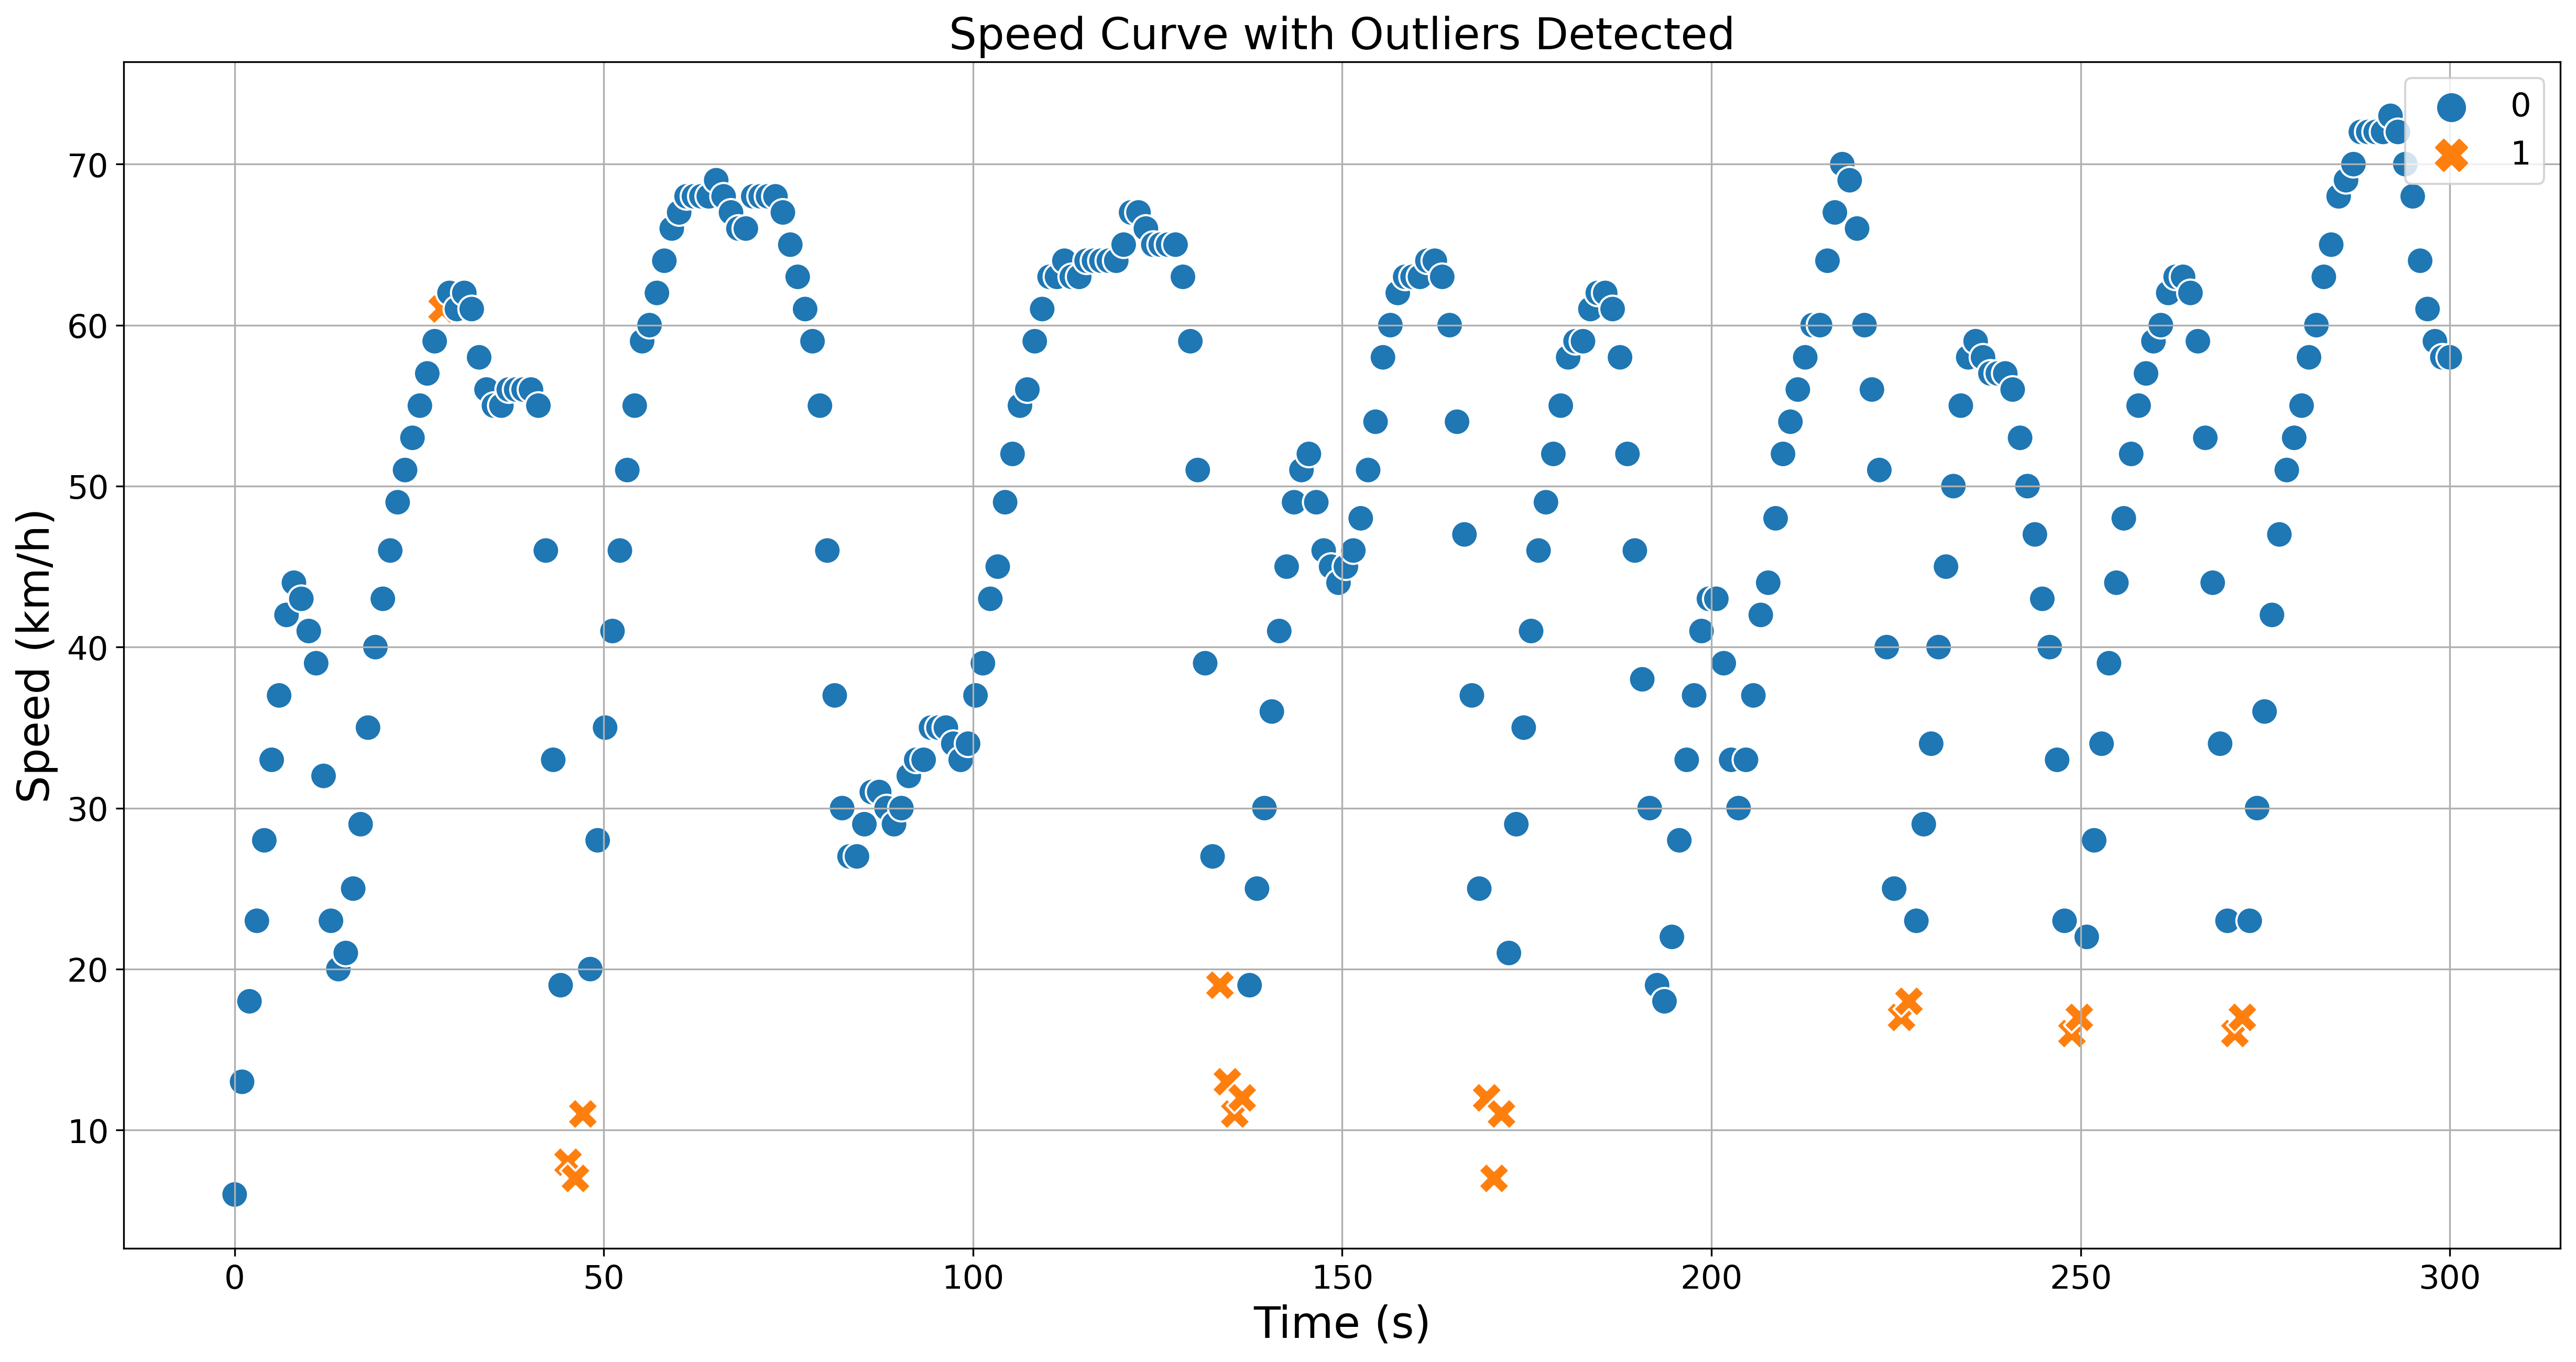

In [18]:
plt.figure(figsize=(20,10), dpi=300)
plt.grid()
plt.title("Speed Curve with Outliers Detected", fontsize=20)
sns.scatterplot(x=t_samples, y=data['speed'].values, hue=data['flag'], style=data['flag'], size=data['flag'], sizes=(200, 150))
plt.ylabel("Speed (km/h)", fontsize=20)
plt.xlabel("Time (s)", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

# move the legend out of the plot
plt.legend(fontsize=15)
plt.savefig('comparison/results_forecasting_speed_outliers_teda_1_7.eps', format='eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


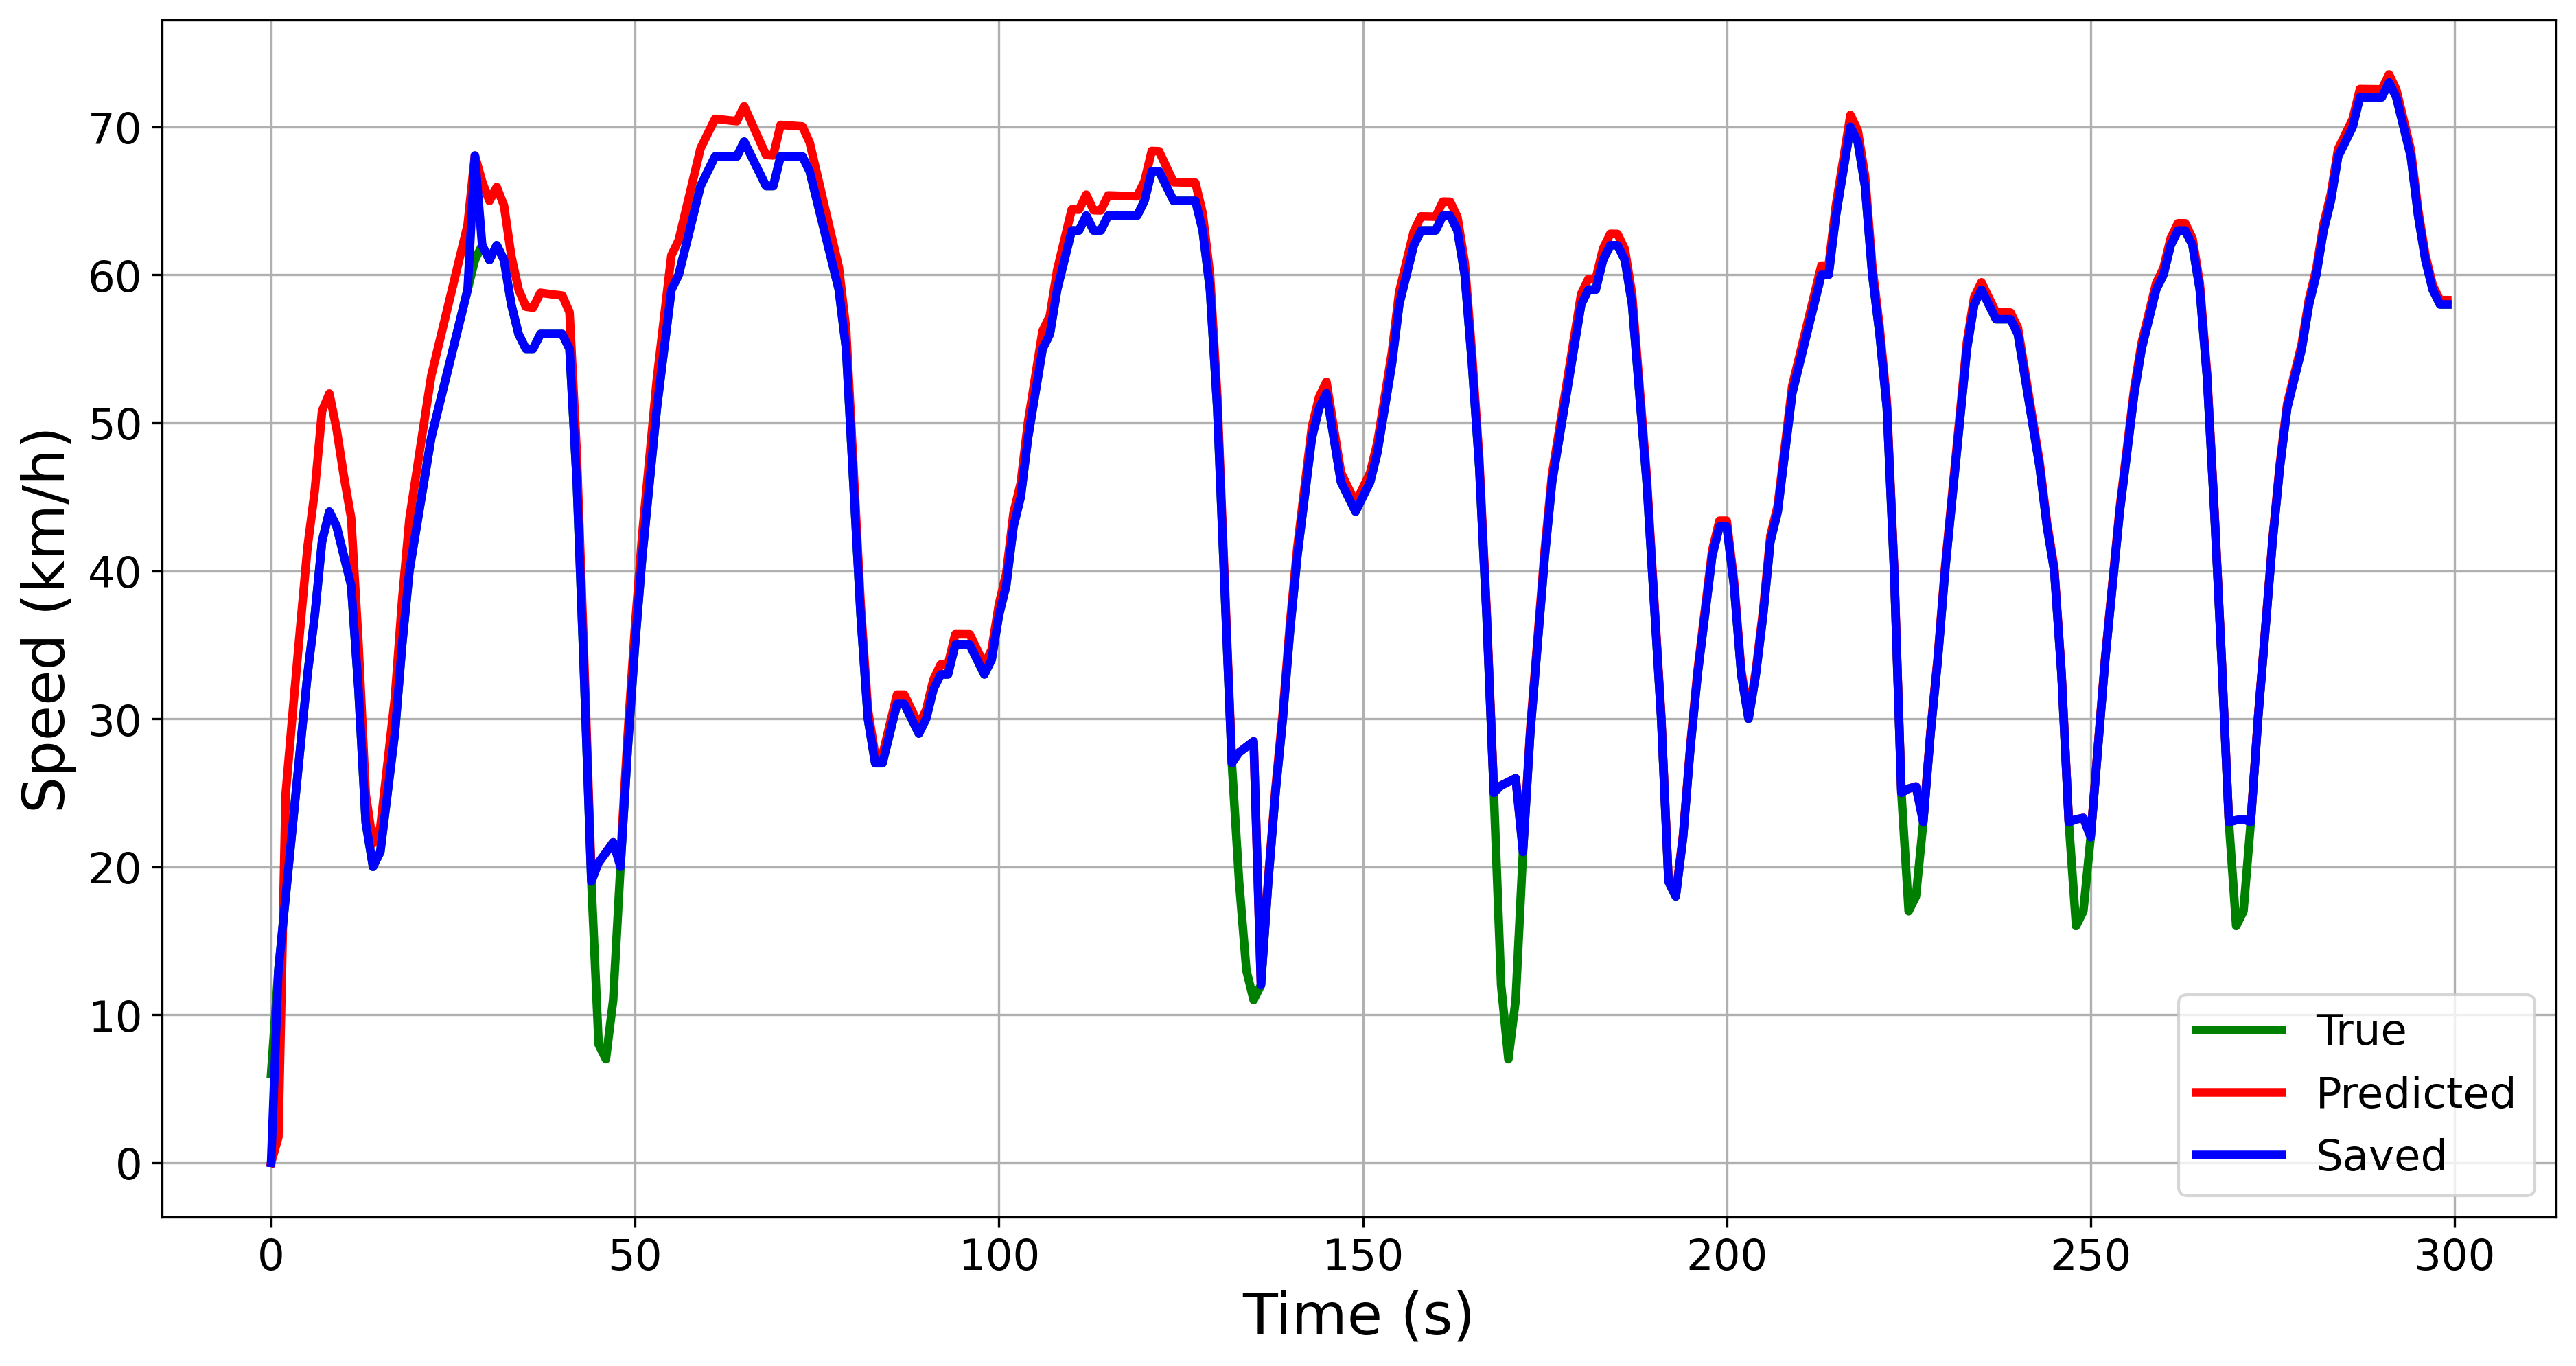

In [19]:
plt.figure(figsize=(15,7.7), dpi=300)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("Speed (km/h)", fontsize=20)
plt.plot(data['speed'], 'g', label='True', linewidth=3)
plt.plot(data['y_pred'], 'r', label='Predicted', linewidth=3)
plt.plot(data['x_atualp'], 'b', label='Saved', linewidth=3)
plt.legend(fontsize=15)

plt.savefig('comparison/results_forecasting_speed_curves.eps', format='eps', bbox_inches='tight')

### Visualization

In [20]:
figure = make_subplots(specs=[[{"secondary_y": True}]])

figure.update_layout(
    title="Speed Dataset"
)

figure.add_trace(
    go.Scatter(y=data['speed'], name='True With Outliers'),
    secondary_y=False
)

figure.add_trace(
    go.Scatter(y=data['y_pred_py'], name='TEDA-Forecasting Python'),
    secondary_y=False
)

figure.add_trace(
    go.Scatter(y=data['y_pred'], name='TEDA-Forecasting Freematics'),
    secondary_y=False
)

figure.add_trace(
    go.Scatter(y=data['y_pred_ar'], name='TEDA-Forecasting Arduino'),
    secondary_y=False
)

figure.add_trace(
    go.Scatter(y=data['y_pred_cpp'], name='TEDA-Forecasting Cpp'),
    secondary_y=False
)

figure.update_xaxes(title='Time (seconds)')
figure.update_yaxes(title='Speed (km/h)', secondary_y=False)
figure.show()

## 3.2 RLS Metrics

### 3.2.1 Calculating RMSE:

In [21]:
rmse_freematics = mean_squared_error(data['speed'], data['y_pred'], squared=False)
rmse_arduino = mean_squared_error(data['speed'], data['y_pred_ar'], squared=False)
rmse_cpp = mean_squared_error(data['speed'], data['y_pred_cpp'], squared=False)
rmse_python = mean_squared_error(data['speed'], data['y_pred_py'], squared=False)
RMSE = [rmse_freematics, rmse_arduino, rmse_cpp, rmse_python]
label = ["Freematics", "Arduino", "Cpp", "Python"]

[Text(0, 0, '3.393'),
 Text(0, 0, '3.769'),
 Text(0, 0, '3.769'),
 Text(0, 0, '2.422')]

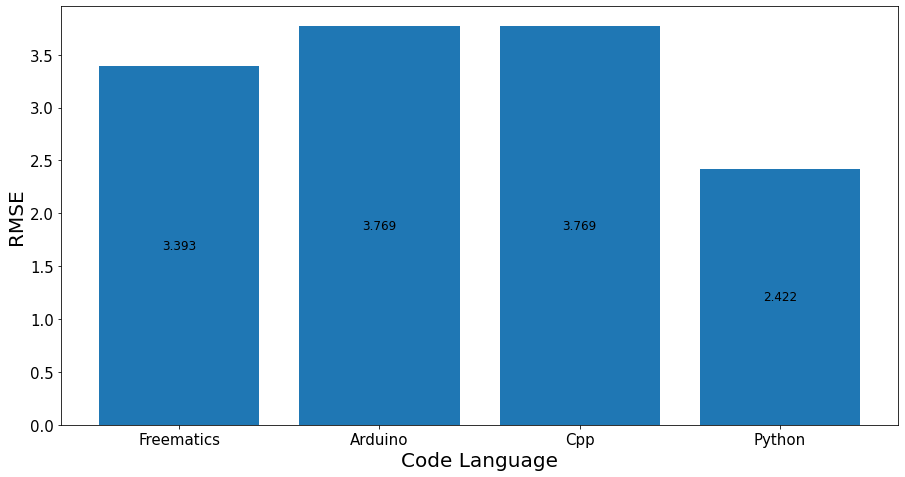

In [22]:
fig, ax = plt.subplots(figsize = (15,7.7))
p1 = ax.bar(label, RMSE)

plt.xlabel("Code Language", fontsize=20)
plt.ylabel("RMSE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.bar_label(p1, label_type='center', fmt='%.3f', fontsize=12)

#plt.savefig('', format='eps')#, bbox_inches='tight')

#### Calculating MAE

In [23]:
mae_freematics = mean_absolute_error(data['speed'], data['y_pred'])
mae_arduino = mean_absolute_error(data['speed'], data['y_pred_ar'])
mae_cpp = mean_absolute_error(data['speed'], data['y_pred_cpp'])
mae_python = mean_absolute_error(data['speed'], data['y_pred_py'])
MAE = [mae_freematics, mae_arduino, mae_cpp, mae_python]

(array([0.  , 0.25, 0.5 , 0.75, 1.  , 1.25, 1.5 , 1.75, 2.  , 2.25]),
 [Text(0, 0.0, '0.00'),
  Text(0, 0.25, '0.25'),
  Text(0, 0.5, '0.50'),
  Text(0, 0.75, '0.75'),
  Text(0, 1.0, '1.00'),
  Text(0, 1.25, '1.25'),
  Text(0, 1.5, '1.50'),
  Text(0, 1.75, '1.75'),
  Text(0, 2.0, '2.00'),
  Text(0, 2.25, '2.25')])

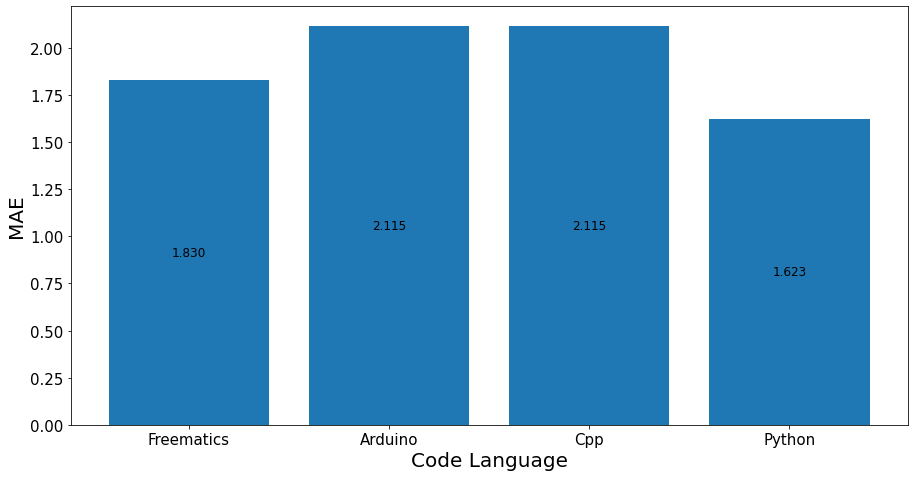

In [26]:
fig, ax = plt.subplots(figsize = (15,7.7))
p2 = ax.bar(label, MAE)

ax.bar_label(p2, label_type='center', fmt='%.3f', fontsize=12)
plt.xlabel("Code Language", fontsize=20)
plt.ylabel("MAE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

#plt.savefig('', format='eps')#, bbox_inches='tight')

In [27]:
pd_results = pd.DataFrame({"Code":label,"RMSE": RMSE, "MAE": MAE})
pd_results.head()

,Code,RMSE,MAE
0,Freematics,3.393358,1.830212
1,Arduino,3.769089,2.114933
2,Cpp,3.769083,2.114632
3,Python,2.422387,1.622845


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


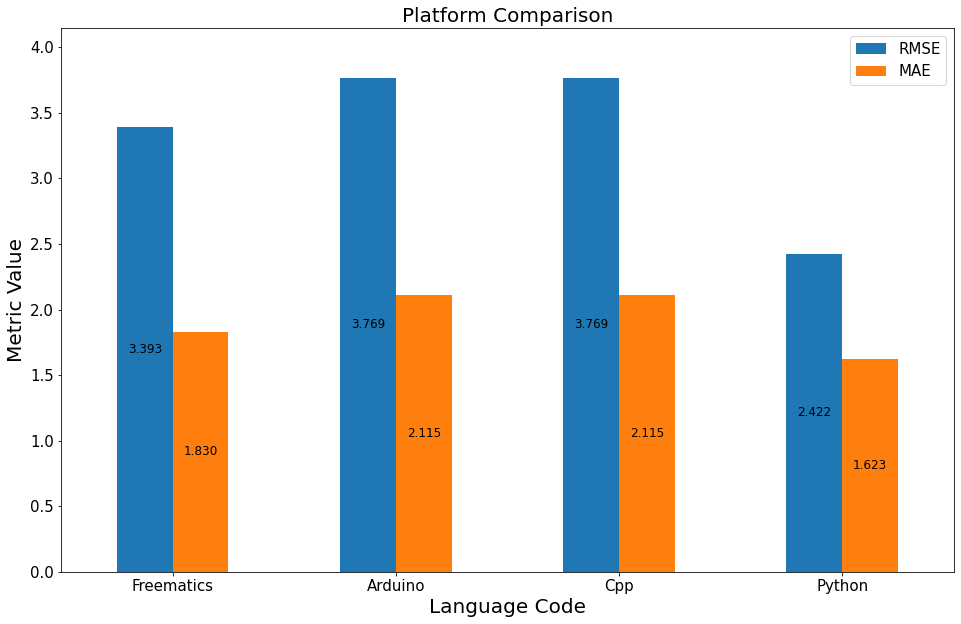

In [28]:
# plot bars or kind='barh' for horizontal bars; adjust figsize accordingly
ax = pd_results.plot(kind='bar', rot=0, xlabel='Code', ylabel='RMSE', figsize=(16, 10))

X_axis = np.arange(len(pd_results))

# add some labels
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%.3f', label_type='center',fontsize=12)
    
# add a little space at the top of the plot for the annotation
ax.margins(y=0.1)

plt.xticks(X_axis, pd_results['Code']) 

# move the legend out of the plot
ax.legend(fontsize=15)

plt.title("Platform Comparison", fontsize=20)
plt.xlabel("Language Code", fontsize=20)
plt.ylabel("Metric Value", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
#plt.show()

plt.savefig('comparison/results_forecasting_speed_platform_comparison.eps', format='eps', bbox_inches='tight')

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


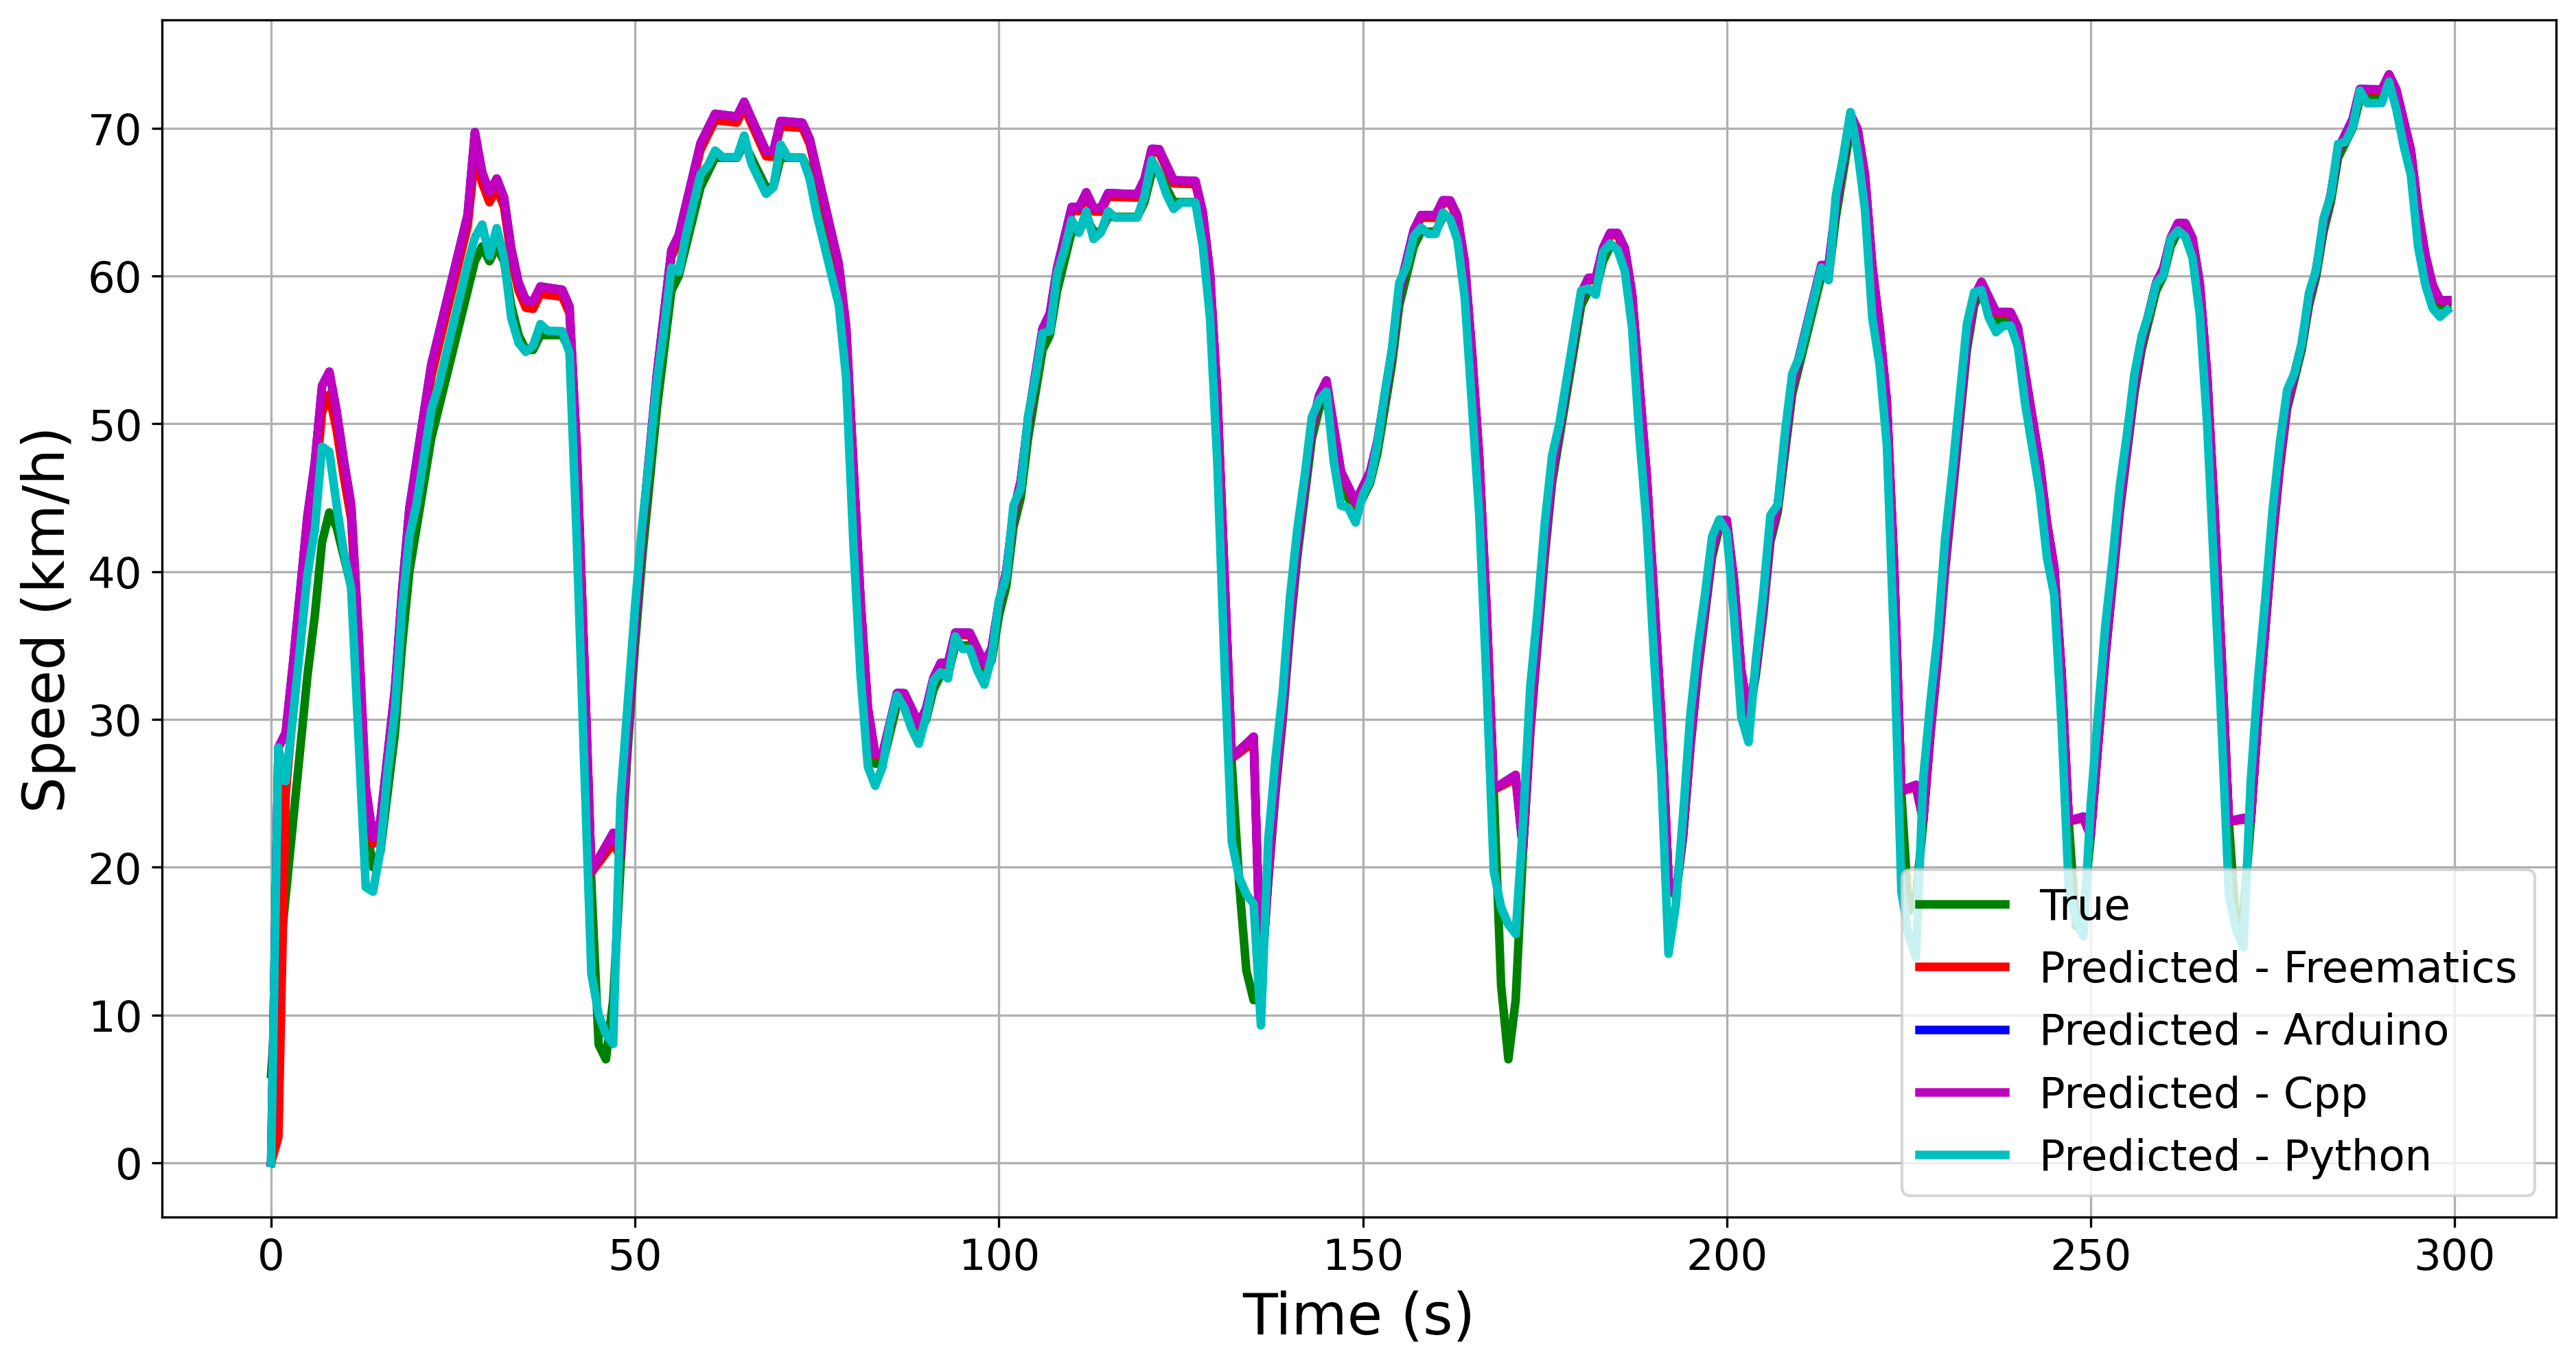

In [29]:
plt.figure(figsize=(15,7.7), dpi=300)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("Speed (km/h)", fontsize=20)
plt.plot(data['speed'], 'g', label='True', linewidth=3)
plt.plot(data['y_pred'], 'r', label='Predicted - Freematics', linewidth=3)
plt.plot(data['y_pred_ar'], 'b', label='Predicted - Arduino', linewidth=3)
plt.plot(data['y_pred_cpp'], 'm', label='Predicted - Cpp', linewidth=3)
plt.plot(data['y_pred_py'], 'c', label='Predicted - Python', linewidth=3)
plt.legend(fontsize=15)

plt.savefig('comparison/results_forecasting_speed_curves_comparison.eps', format='eps', bbox_inches='tight')

## 3.3 Calculating metrics to virtual prediction:

### 3.3.1 Calculating RMSE:

In [30]:
virtual_rmse_freematics = mean_squared_error(data['speed'].iloc[1:], data['y_pred'].iloc[0:-1], squared=False)
virtual_rmse_arduino = mean_squared_error(data['speed'].iloc[1:], data['y_pred_ar'].iloc[0:-1], squared=False)
virtual_rmse_cpp = mean_squared_error(data['speed'].iloc[1:], data['y_pred_cpp'].iloc[0:-1], squared=False)
virtual_rmse_python = mean_squared_error(data['speed'].iloc[1:], data['y_pred_py'].iloc[0:-1], squared=False)

virtual_RMSE = [virtual_rmse_freematics, virtual_rmse_arduino, virtual_rmse_cpp, virtual_rmse_python]

[Text(0, 0, '5.326'),
 Text(0, 0, '5.446'),
 Text(0, 0, '5.446'),
 Text(0, 0, '3.358')]

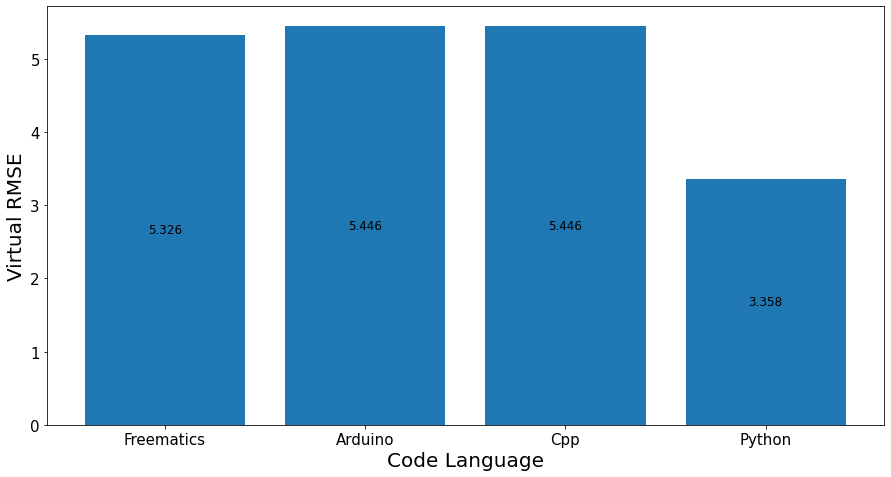

In [31]:
fig, ax = plt.subplots(figsize = (15,7.7))
p1 = ax.bar(label, virtual_RMSE)

plt.xlabel("Code Language", fontsize=20)
plt.ylabel("Virtual RMSE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.bar_label(p1, label_type='center', fmt='%.3f', fontsize=12)

### 3.3.2 Calculating MAE:

In [32]:
virtual_mae_freematics = mean_absolute_error(data['speed'].iloc[1:], data['y_pred'].iloc[0:-1])
virtual_mae_arduino = mean_absolute_error(data['speed'].iloc[1:], data['y_pred_ar'].iloc[0:-1])
virtual_mae_cpp = mean_absolute_error(data['speed'].iloc[1:], data['y_pred_cpp'].iloc[0:-1])
virtual_mae_python = mean_absolute_error(data['speed'].iloc[1:], data['y_pred_py'].iloc[0:-1])
virtual_MAE = [virtual_mae_freematics, virtual_mae_arduino, virtual_mae_cpp, virtual_mae_python]

[Text(0, 0, '3.886'),
 Text(0, 0, '4.034'),
 Text(0, 0, '4.034'),
 Text(0, 0, '2.411')]

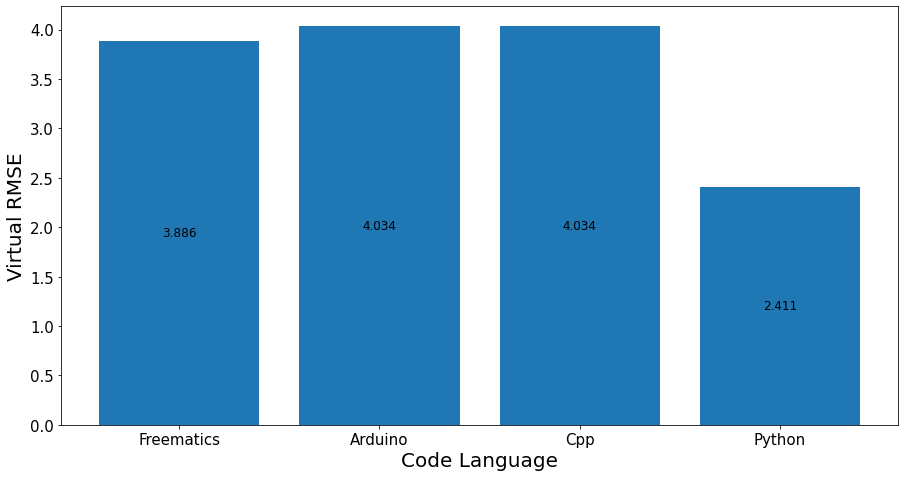

In [33]:
fig, ax = plt.subplots(figsize = (15,7.7))
p1 = ax.bar(label, virtual_MAE)

plt.xlabel("Code Language", fontsize=20)
plt.ylabel("Virtual RMSE", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

ax.bar_label(p1, label_type='center', fmt='%.3f', fontsize=12)

In [34]:
pd_virtual_results = pd.DataFrame({"Code":label,"RMSE": virtual_RMSE, "MAE": virtual_MAE})
pd_virtual_results.head()

,Code,RMSE,MAE
0,Freematics,5.325687,3.885810
1,Arduino,5.446118,4.034047
2,Cpp,5.446014,4.033743
3,Python,3.357877,2.410940


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


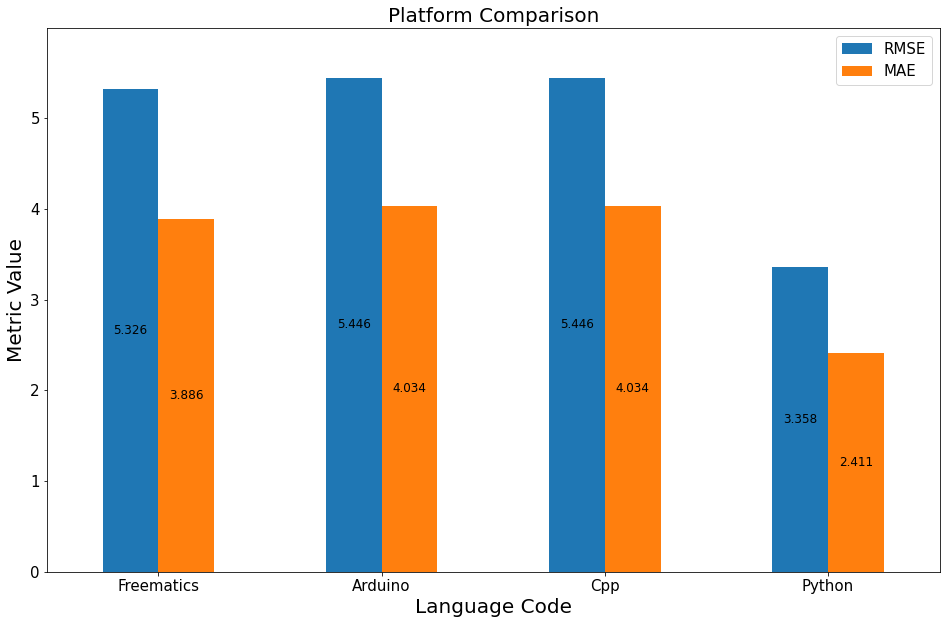

In [35]:
# plot bars or kind='barh' for horizontal bars; adjust figsize accordingly
ax = pd_virtual_results.plot(kind='bar', rot=0, xlabel='Code', ylabel='RMSE', figsize=(16, 10))

X_axis = np.arange(len(pd_virtual_results))

# add some labels
for c in ax.containers:
    # set the bar label
    ax.bar_label(c, fmt='%.3f', label_type='center',fontsize=12)
    
# add a little space at the top of the plot for the annotation
ax.margins(y=0.1)

plt.xticks(X_axis, pd_virtual_results['Code']) 

# move the legend out of the plot
ax.legend(fontsize=15)

plt.title("Platform Comparison", fontsize=20)
plt.xlabel("Language Code", fontsize=20)
plt.ylabel("Metric Value", fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.savefig('comparison/results_forecasting_speed_virtual_platform_comparison.eps', format='eps', bbox_inches='tight')

# 4. Freematics Times Evaluation

#### The time wall is the overall duration of the algorithm, encompassing both the TEDA and RLS algorithms. The RLS time takes into account the two instances when the filter is utilized.

In [36]:
data.head()

,speed,flag,x_antp,x_atualp,y_pred,ypred_virtual,Y_virtual_0,Y_virtual_1,time_teda,time_rls_filter_1,time_rls_filter_2,time_rls_update_1,flag_ar,y_pred_ar,flag_cpp,y_pred_cpp,flag_py,save_py,ya_pred_py,y_pred_py
0,6.0,0,0.000,0.0,0.000000,0.000000,0.000000,0.000000,44,29,62,39,0,0.00,0,0.0000,0,6.0,0.000000,0.000000
1,13.0,0,0.001,13.0,1.724296,0.030335,0.228708,0.030335,94,28,53,37,0,28.09,0,28.0897,0,13.0,0.000000,28.090191
2,18.0,0,13.000,18.0,24.910070,47.706749,34.472866,47.706749,83,24,52,44,0,29.09,0,29.0861,0,18.0,28.090191,25.817022
3,23.0,0,18.000,23.0,30.632137,54.334572,40.796864,54.334572,83,24,52,42,0,33.72,0,33.7203,0,23.0,25.817022,30.143093
4,28.0,0,23.000,28.0,36.166336,60.338913,46.714424,60.338913,83,28,53,44,0,38.71,0,38.7148,0,28.0,30.143093,34.930386


In [37]:
data['time_rls'] = data['time_rls_filter_1'] + data['time_rls_filter_2']
data['time_forecasting'] = data['time_rls_update_1']
data['time_wall'] = data['time_teda'] + data['time_rls'] + data['time_forecasting']


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


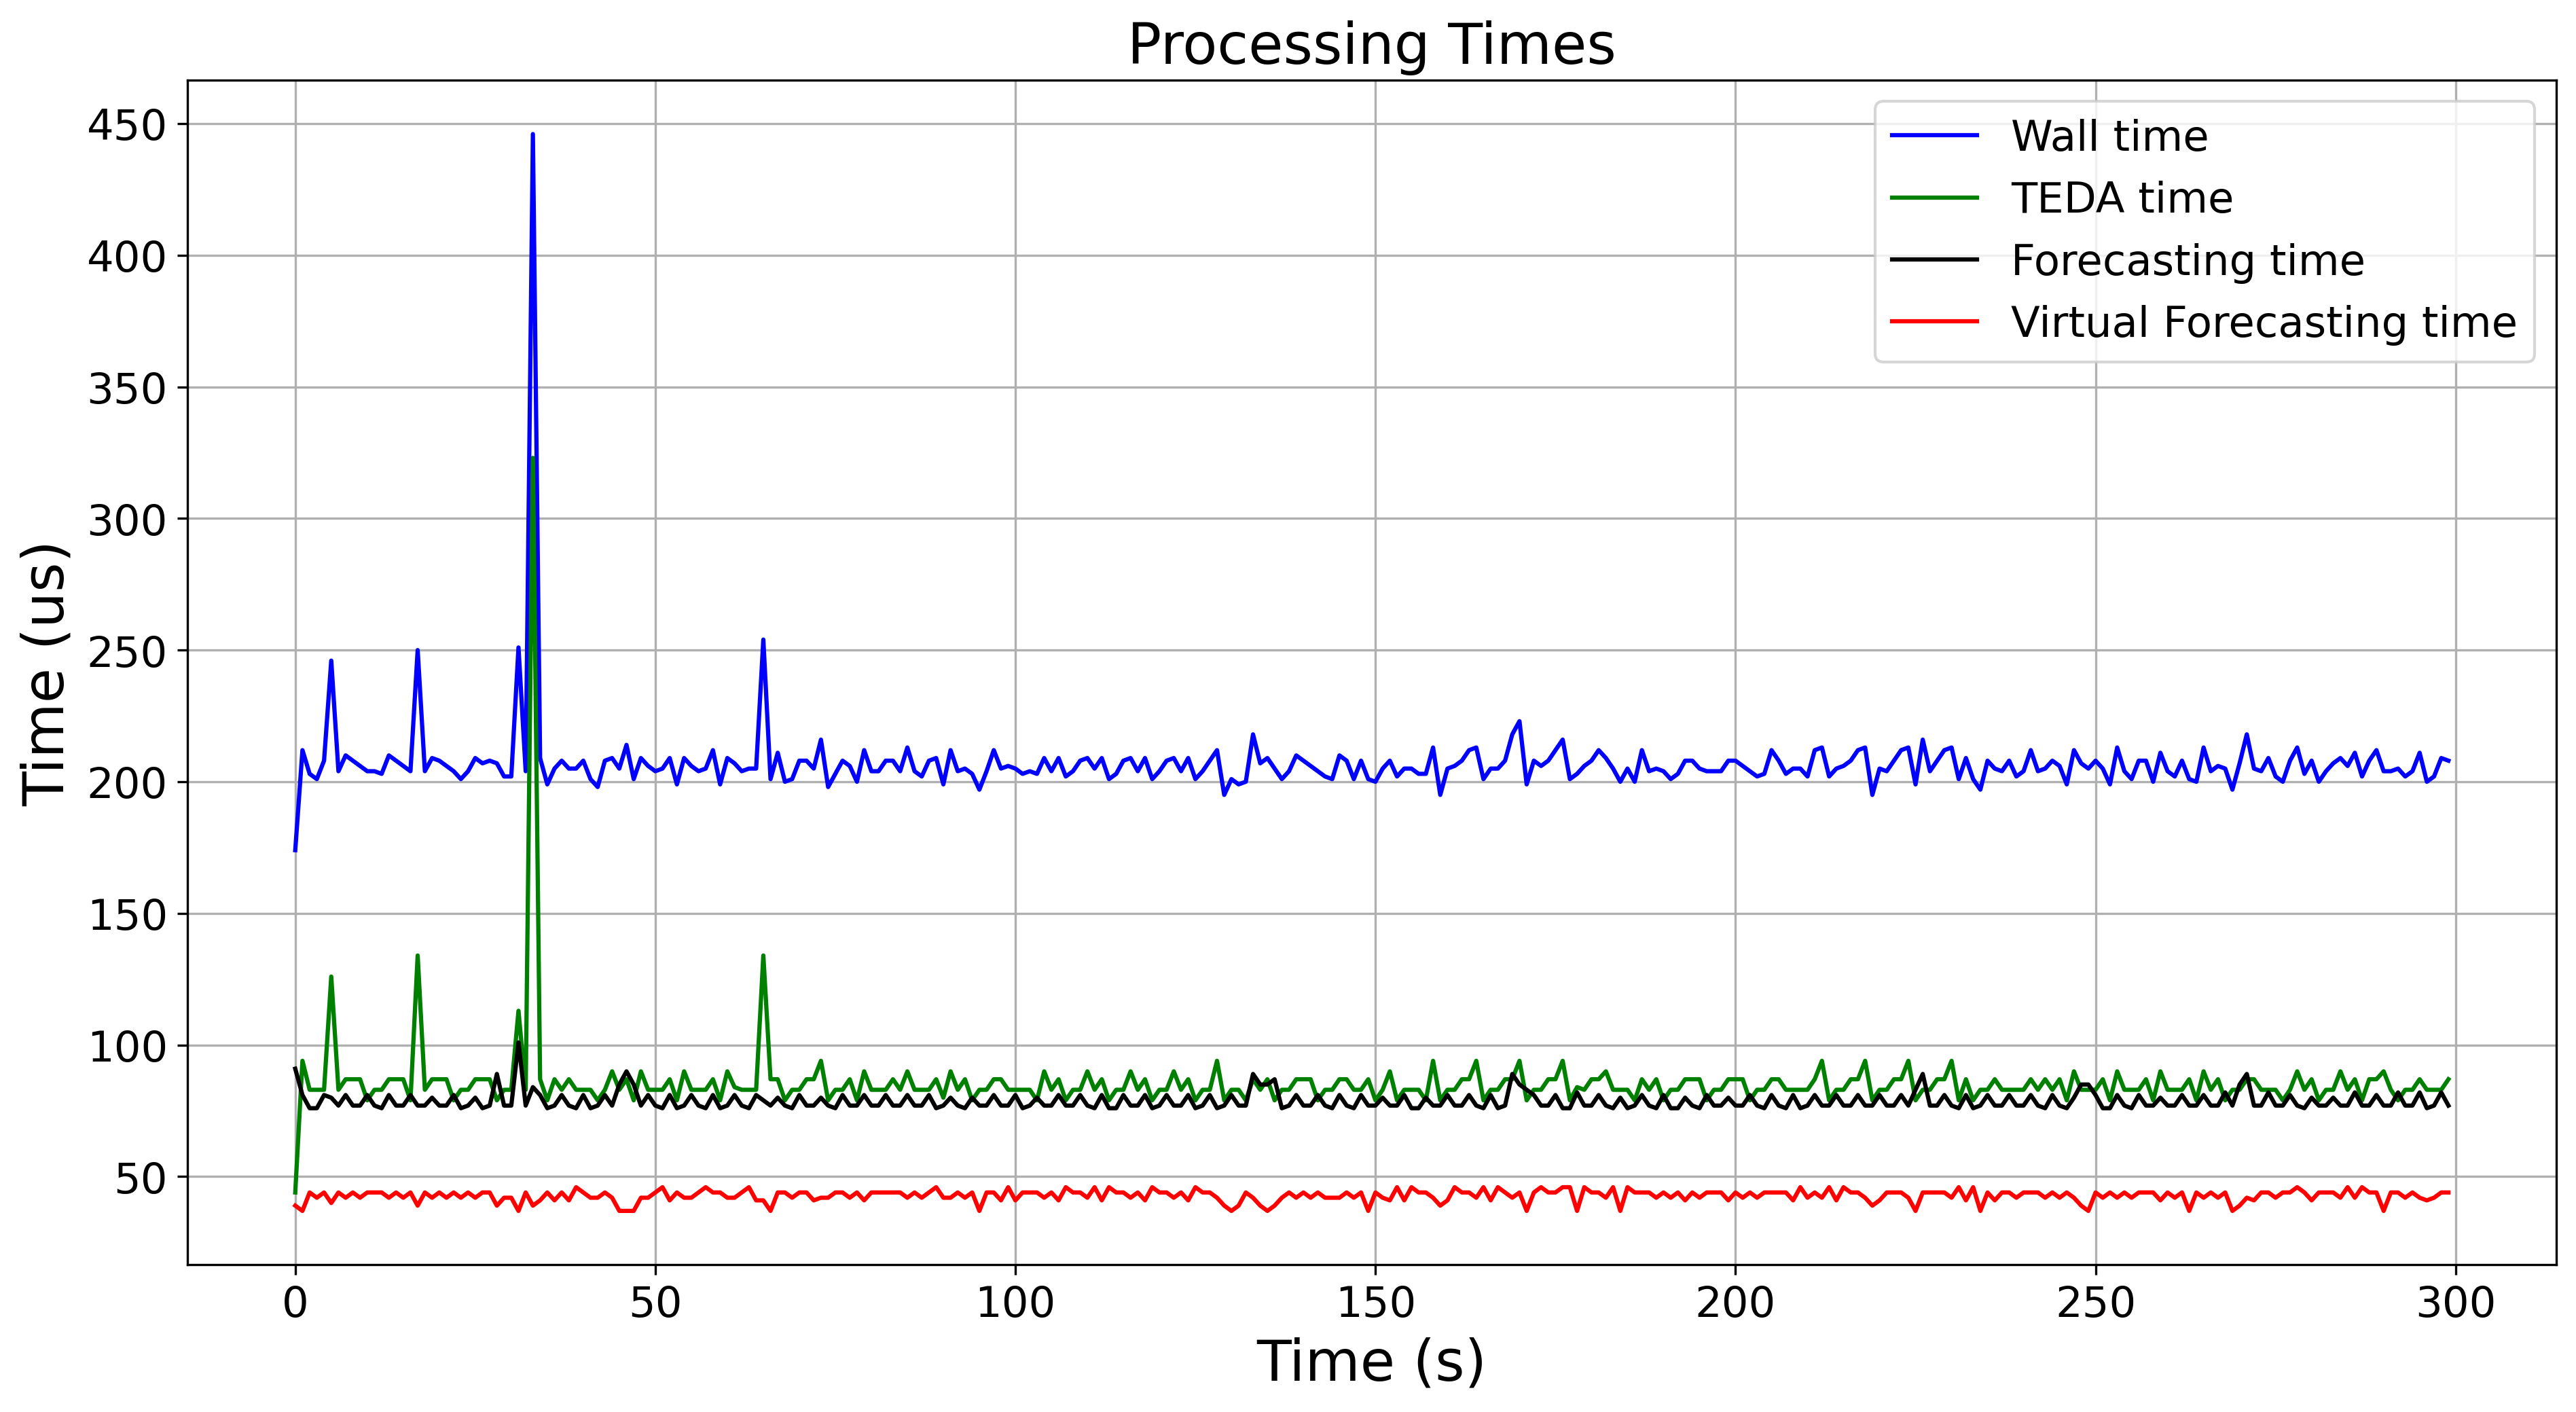

In [38]:
plt.figure(figsize=(15,7.7), dpi=300)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.grid()
plt.title("Processing Times", fontsize=20)
plt.xlabel("Time (s)", fontsize=20)
plt.ylabel("Time (us)", fontsize=20)
plt.plot(data['time_wall'], 'b', label='Wall time')
plt.plot(data['time_teda'], 'g', label='TEDA time')
plt.plot(data['time_rls'], 'k', label='Forecasting time')
plt.plot(data['time_forecasting'], 'r', label='Virtual Forecasting time')
plt.legend(fontsize=15)

plt.savefig('comparison/results_forecasting_speed_times.eps', format='eps', bbox_inches='tight')

### 4.2 Mean and Standard Deviation

#### 4.2.1 TEDA Time

In [39]:
data['time_teda'].mean()

85.58666666666667

In [40]:
data['time_teda'].std()

15.240628094162293

### 4.2.2 RLS Time

In [41]:
data['time_rls'].mean()

78.72333333333333

In [42]:
data['time_rls'].std()

3.1622970497712863

#### 4.2.3 Forecasting Time

In [43]:
data['time_forecasting'].mean()

42.76

In [44]:
data['time_forecasting'].std()

2.2117956808392782

#### 4.2.4 Wall Time

In [45]:
data['time_wall'].mean()

207.07

In [46]:
data['time_wall'].std()

15.475466612985581

In [47]:
1000000/data['time_wall'].mean()

4829.284782923649